# Activity 03

## Web References

- [What is the standard Python docstring format?](https://stackoverflow.com/questions/3898572/what-is-the-standard-python-docstring-format)
- [Calculate the Euclidean distance using NumPy](https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pprint import pprint

## Preperation

In [2]:
#np.set_printoptions(precision=2, suppress=True)

### Data Load

In [3]:
"""
Load a dataset from file.
Returns
  - A dataframe with the X, Y values
  - The number of clusters
"""
def loadData(path):
    # load the data
    df_data = pd.read_csv(path, sep='\t').reset_index()
    
    # get the number of clusters from the header
    clusters = int(df_data.columns[1].split()[0])

    # update the column names
    df_data.columns = ['x', 'y']

    return (df_data, clusters)

df_test01, k_test01 = loadData('Test-case-1.txt')
print('Test-1 Clusters:', k_test01)
df_test01.head(3)

Test-1 Clusters: 2


,x,y
0,5.25,7.15
1,1.99,2.64
2,6.78,6.78


### Points Mean

In [4]:
test_points = df_test01.sample(n=2, random_state=1).to_numpy()
print('input')
print(test_points)
print('\nmean')
print(test_points.mean(axis=1))


input
[[1.57 3.09]
 [6.33 8.31]]

mean
[2.33 7.32]


### Data Plot

In [5]:
test_inputs01 = df_test01.sample(n=10, random_state=1).to_numpy()
test_inputs02 = df_test01.sample(n=10, random_state=2).to_numpy()
print(test_inputs01)

[[1.57 3.09]
 [6.33 8.31]
 [1.35 2.65]
 [1.26 3.18]
 [5.07 6.71]
 [5.9  7.13]
 [5.63 6.24]
 [2.22 2.63]
 [5.6  6.75]
 [2.93 4.19]]


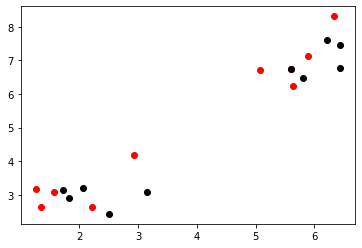

In [6]:
#Plotting the results
plt.scatter(test_inputs01[:,0], test_inputs01[:,1], color = 'red')
plt.scatter(test_inputs02[:,0], test_inputs02[:,1], color = 'black')
plt.show()

## K-means Class

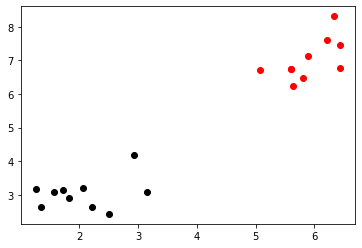

In [7]:
colors = ['red', 'black', 'green', 'blue']

class KMeans:
    """Implement k-means clustering."""

    def __init__(self, k):
        """
        Create a new instance of the class with k clusters

        Args:
            k: The number of clusters to use.
        """
        self.k = k
        self.means = None
        self.assignments = None

    def calculate_distance(self, point1, point2):
        """
        Calculate the distance between two points.

        Args:
            point1: The first point.
            point2: The second pounts.

        Returns:
            The distance between two points.
        """
        # calculate the sum of squares
        sum_sq = np.sum(np.square(point1 - point2))

        # take the squareroot to get the euclidean distance
        return np.sqrt(sum_sq)

    def find_assignments(self, inputs):
        """
        Determine which cluster the inputs should be assigned to.

        Args:
            input: The numpy matrix of the values to cluster.
        """
        # initialize the assignment matrix
        assignments = [[] for index in range(self.k)]
        
        # classify each input item
        for input in inputs:
            # assign it to the first cluster
            assigned_cluster = 0
            distance = self.calculate_distance(self.means[0], input)
            
            # find a better cluster to assign the input to
            for cluster_index in range(1, self.k):
                current_distance = self.calculate_distance(self.means[cluster_index], input)
                if (current_distance < distance):
                    assigned_cluster = cluster_index
                    distance = current_distance

            # assign the input to the cluster
            assignments[assigned_cluster].append(input)

        # return the cluster assignments
        return assignments

    def is_converged(self, assigments_old, assignments_new):
        """
        If the assignments have not changed the clusters have converged
        """
        if assigments_old is None:
            return False
        else:
            sum = 0
            for cluster in range(self.k):
                if len(assigments_old[cluster]) != len(assignments_new[cluster]):
                    return False

                sum = sum + np.sum(np.array(assigments_old[cluster]) - np.array(assignments_new[cluster]))

            return sum == 0
    
    def train(self, inputs):
        """
        Perform the clustering.

        Args:
            input: A numpy matrix of the x,y values to cluster.
        """
        # choose k random points as the initial means
        self.means = random.sample(list(inputs), self.k)
        self.assignments = None
        
        training_complete = False
        while training_complete == False:
            # find the new assignments
            new_assignments = self.find_assignments(inputs)

            # if no assignments were changed, training is complete
            if self.is_converged(self.assignments, new_assignments):
                training_complete = True
            else:
                self.assignments = new_assignments

                # show a plot of the clusters
                for i in range(len(self.assignments)):
                    cluster_points = np.array(self.assignments[i])
                    plt.scatter(cluster_points[:,0], cluster_points[:,1], color = colors[i])
                plt.show()           

                # calculate the new means
                for i in range(self.k):
                    #self.means = random.sample(list(inputs), self.k)
                    if len(self.assignments[i]) > 0:
                        self.means[i] = np.array(self.assignments[i]).mean(axis=0)                

        return self.assignments

        
# test the KMeans class
test_inputs = np.append(test_inputs01, test_inputs02, axis=0)
clusters = KMeans(k=2)
assignments = clusters.train(test_inputs)

# plot the assignments
#colors = ['red', 'black', 'green', 'blue']
#for i in range(len(assignments)):
#    cluster_points = np.array(assignments[i])
#    plt.scatter(cluster_points[:,0], cluster_points[:,1], color = colors[i])
#
#plt.show()


## Question 1

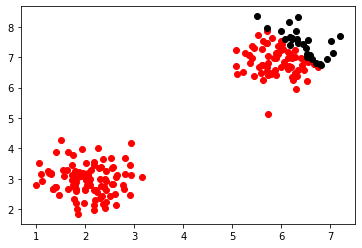

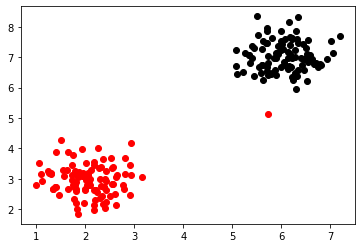

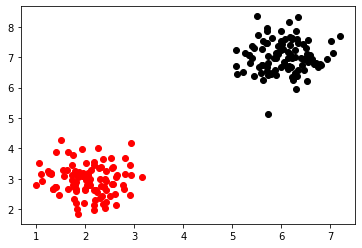

In [8]:
# load the data
df_input, k_input = loadData('Test-case-1.txt')

# perform the clustering
clusters = KMeans(k=k_input)
assignments = clusters.train(df_input.to_numpy())


In [9]:
# show the question answers
for i in range(len(assignments)):
    print(clusters.means[i], len(assignments[i]))

[2.0529 2.9533] 100
[6.048  7.0184] 100


## Question 2

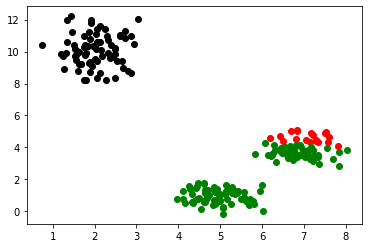

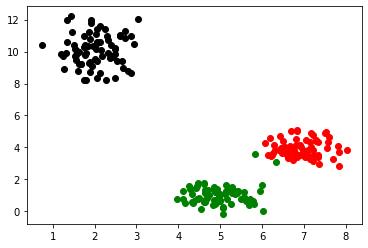

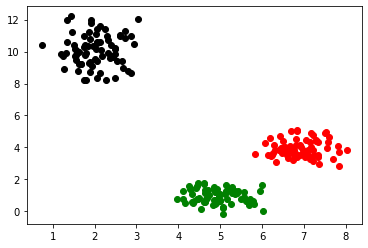

[6.89814286 3.93414286] 70
[ 2.01853333 10.07453333] 75
[4.9344     0.94373333] 75


In [10]:
# load the data
df_input, k_input = loadData('Test-case-2.txt')

# perform the clustering
clusters = KMeans(k=k_input)
assignments = clusters.train(df_input.to_numpy())

# show the question answers
for i in range(len(assignments)):
    print(clusters.means[i], len(assignments[i]))


## Question 3

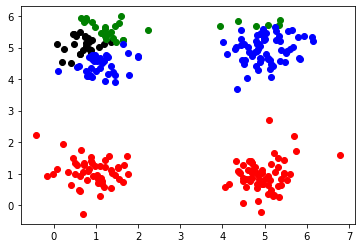

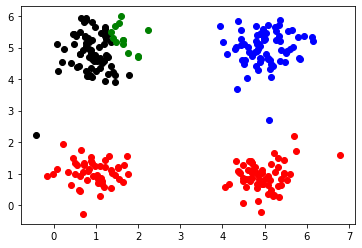

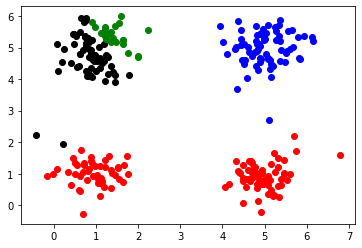

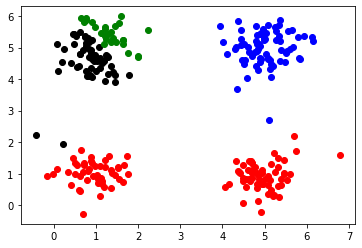

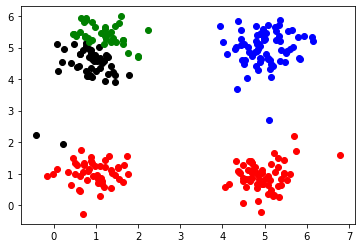

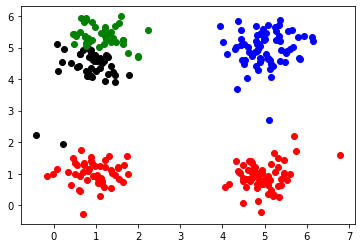

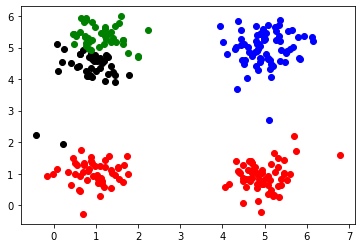

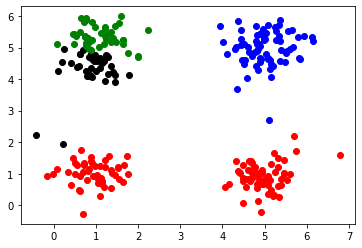

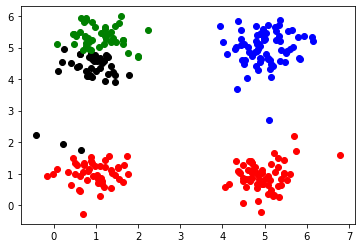

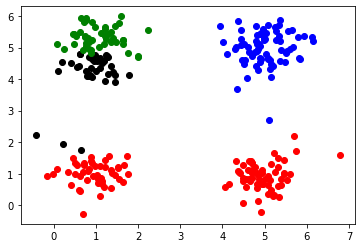

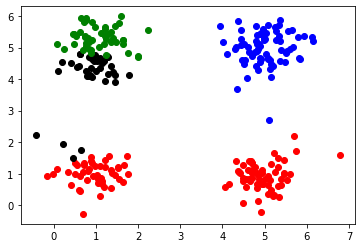

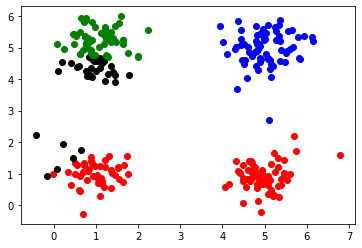

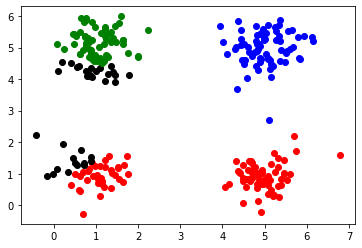

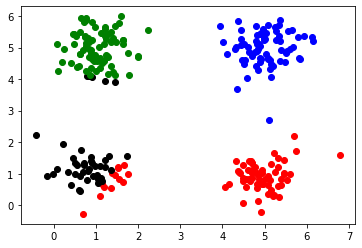

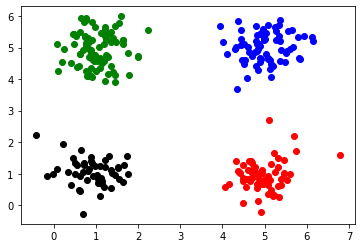

[4.95783333 0.95616667] 60
[0.913  1.0644] 50
[1.0315   4.938875] 80
[5.00728571 5.00928571] 70


In [11]:
# load the data
df_input, k_input = loadData('Test-case-3.txt')

# perform the clustering
clusters = KMeans(k=k_input)
assignments = clusters.train(df_input.to_numpy())

# show the question answers
for i in range(len(assignments)):
    print(clusters.means[i], len(assignments[i]))
